# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
import matplotlib as plt
import numpy as np
import pandas as pd
import time
import requests
import datetime

from config import api_key
from citipy import citipy

lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [40]:
lats = np.random.uniform(lat_range[0],lat_range[1],1200)
lngs = np.random.uniform(lng_range[0],lng_range[1],1200)
latlng = list(zip(lats,lngs))
print(latlng[0])

(87.09589986062616, -50.44441036044776)


In [46]:
cities = []

for coords in latlng: 
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    if city not in cities:
        cities.append(city)
print(len(cities))
print(cities[0])

528
upernavik


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {'q': '', 'appid': api_key, 'units': 'Imperial'}

In [64]:
params['q'] = 'moscow'
resp = requests.get(url, params)
print(resp.json())

{'coord': {'lon': 37.62, 'lat': 55.75}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 14.72, 'pressure': 1035, 'humidity': 92, 'temp_min': 12.2, 'temp_max': 15.8}, 'visibility': 6000, 'wind': {'speed': 2.24, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1544907600, 'sys': {'type': 1, 'id': 9029, 'message': 0.0047, 'country': 'RU', 'sunrise': 1544853223, 'sunset': 1544878572}, 'id': 524901, 'name': 'Moscow', 'cod': 200}


In [99]:
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
    
for city in cities:
    params['q'] = city
    resp = requests.get(url, params).json()
    try: Cloudiness.append(resp['clouds']['all'])
    except: Cloudiness.append(0)
    try: Country.append(resp['sys']['country'])
    except: (Country.append(0))
    try: Date.append(resp['dt'])
    except: Date.append(0)
    try: Humidity.append(resp['main']['humidity'])
    except: Humidity.append(0)
    try: Max_Temp.append(resp['main']['temp_max'])
    except: Max_Temp.append(0)
    try: Wind_Speed.append(resp['wind']['speed'])
    except: Wind_Speed.append(0)
    try: Lat.append(resp['coord']['lat'])
    except: Lat.append(0)
    try: Lng.append(resp['coord']['lon'])
    except: Lng.append(0)

In [101]:
resp['coord']['lat']

21.28

In [103]:
print(len(Cloudiness))
print(len(Country))
print(len(Date))
print(len(Humidity))
print(len(Lat))
print(len(Lng))
print(len(Max_Temp))
print(len(Wind_Speed))

528
528
528
528
528
528
528
528


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [129]:
weather = pd.DataFrame({'City': cities, 
                        'Cloudiness':Cloudiness,
                        'Country':Country,
                        'Date':Date,
                        'Humidity':Humidity,
                        'Lat':Lat,
                        'Lng':Lng,
                        'Max_Temp':Max_Temp,
                        'Wind_Speed':Wind_Speed
                       })
weather.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
count,528.000000,5.280000e+02,528.000000,528.000000,528.000000,528.000000,528.000000
mean,38.073864,1.360573e+09,65.857955,19.319053,16.450436,42.707178,7.444811
std,36.473747,5.012764e+08,31.941548,32.283999,84.913449,33.395371,6.598765
min,0.000000,0.000000e+00,0.000000,-54.810000,-173.230000,-50.700000,0.000000
25%,0.000000,1.544908e+09,50.000000,-0.097500,-52.277500,11.485000,2.590000
50%,32.000000,1.544909e+09,76.000000,19.250000,5.885000,51.590000,5.820000
75%,75.000000,1.544910e+09,90.250000,46.885000,82.497500,73.400000,10.290000
max,100.000000,1.544910e+09,100.000000,78.220000,179.320000,89.600000,38.030000


In [128]:
weath = weather.loc[weather.Lat != 0, :]
weath.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
count,465.000000,4.650000e+02,465.000000,465.000000,465.000000,465.000000,465.000000
mean,43.232258,1.544909e+09,74.780645,21.936473,18.679204,48.493312,8.453462
std,35.881357,1.361018e+03,22.138359,33.559338,90.263815,31.392378,6.396163
min,0.000000,1.544904e+09,0.000000,-54.810000,-173.230000,-50.700000,0.250000
25%,1.000000,1.544908e+09,64.000000,-4.340000,-60.280000,30.200000,3.380000
50%,40.000000,1.544910e+09,78.000000,27.030000,19.240000,57.670000,6.930000
75%,75.000000,1.544910e+09,92.000000,50.560000,97.530000,75.200000,11.410000
max,100.000000,1.544910e+09,100.000000,78.220000,179.320000,89.600000,38.030000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

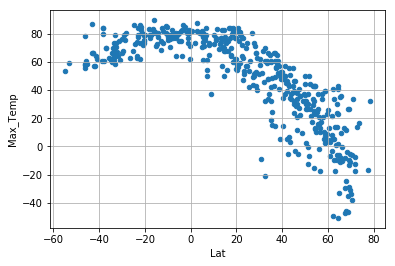

In [140]:
weath.plot(x='Lat', y='Max_Temp', kind='Scatter', grid=True, figsize=(6, 4), marker = 'o')
plt.title = 'Latitude vs. Max Temp'

#### Latitude vs. Humidity Plot

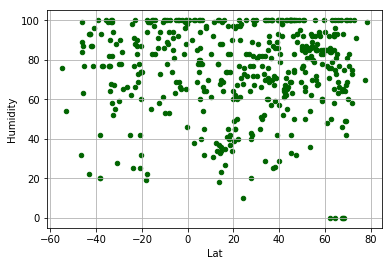

In [147]:
weath.plot(x='Lat', y='Humidity', kind='Scatter', grid=True, figsize=(6, 4), marker = 'o', color='darkgreen')
plt.title = 'Latitude vs. Humidity'

#### Latitude vs. Cloudiness Plot

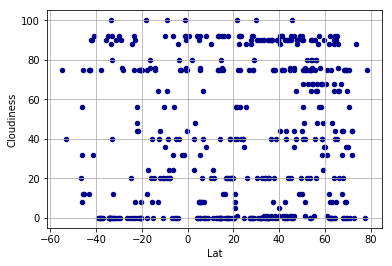

In [146]:
weath.plot(x='Lat', y='Cloudiness', kind='Scatter', grid=True, figsize=(6, 4), marker = 'o', color='darkblue')
plt.title = 'Latitude vs. Cloudiness'

#### Latitude vs. Wind Speed Plot

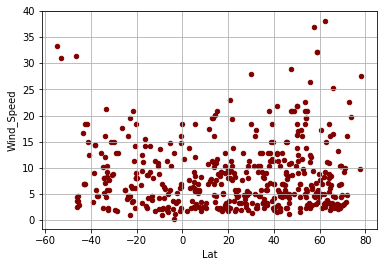

In [148]:
weath.plot(x='Lat', y='Wind_Speed', kind='Scatter', grid=True, figsize=(6, 4), marker = 'o', color='maroon')
plt.title = 'Latitude vs. Wind Speed'

## Analysis of Results
#### We notice that many of the lat/long combinations did not yield a city
+ this makes sense because roughly 2/3 of the earth is water and we are using the full range

#### Even those lat/long combos which yield a city, many did not yield results from the weather API
+ there are no cities below -60 latitude (this is mostly antarctica with no cities)

#### The only plot with an observable trend is the Max Temp, which is highest near the equator (latitude zero)